In [28]:
import pandas as pd

data = pd.read_csv("troop_movements.csv")
print(data.head())

             timestamp  unit_id           unit_type empire_or_resistance  \
0  2024-07-11 09:53:13        1  resistance_soldier           resistance   
1  2024-07-11 09:53:12        2              x-wing           resistance   
2  2024-07-11 09:53:11        3              x-wing               empire   
3  2024-07-11 09:53:10        4               at-st           resistance   
4  2024-07-11 09:53:09        5             unknown           resistance   

   location_x  location_y  destination_x  destination_y  homeworld  
0           4           1              9              2   Alderaan  
1           1           3              3              2    Quermia  
2          10           6              5              2  Chandrila  
3           5           8              5              1      Shili  
4           5           7              9              5   Iridonia  


In [29]:
factionCount = data.groupby("empire_or_resistance").size().reset_index(name="count")
print(factionCount)

homeworldCount = data.groupby("homeworld").size().reset_index(name="count")
print(homeworldCount.head())

unitCount = data.groupby("unit_type").size().reset_index(name="count")
print(unitCount)

  empire_or_resistance  count
0               empire    527
1           resistance    473
     homeworld  count
0     Alderaan     28
1  Aleen Minor     28
2   Bestine IV     24
3        Cerea     24
4     Champala     30
            unit_type  count
0               at-at    125
1               at-st    143
2  resistance_soldier    118
3        stormtrooper    119
4         tie_fighter    121
5        tie_silencer    126
6             unknown    121
7              x-wing    127


In [30]:
data['is_resistance'] = data['empire_or_resistance'] == 'resistance'
data.head()

,timestamp,unit_id,unit_type,empire_or_resistance,location_x,location_y,destination_x,destination_y,homeworld,is_resistance
0,2024-07-11 09:53:13,1,resistance_soldier,resistance,4,1,9,2,Alderaan,True
1,2024-07-11 09:53:12,2,x-wing,resistance,1,3,3,2,Quermia,True
2,2024-07-11 09:53:11,3,x-wing,empire,10,6,5,2,Chandrila,False
3,2024-07-11 09:53:10,4,at-st,resistance,5,8,5,1,Shili,True
4,2024-07-11 09:53:09,5,unknown,resistance,5,7,9,5,Iridonia,True


C:\Users\wasadmin\AppData\Local\Temp\2\ipykernel_3636\186150088.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="empire_or_resistance", y="count", data=factionCount, palette=custom_palette)


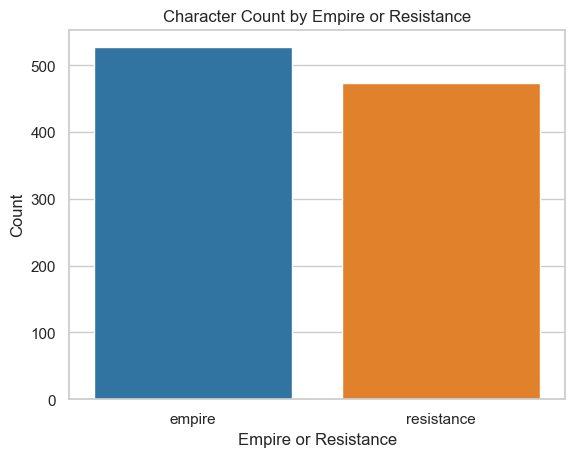

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="whitegrid")

custom_palette = sns.color_palette(["#1f77b4", "#ff7f0e"])

sns.barplot(x="empire_or_resistance", y="count", data=factionCount, palette=custom_palette)
plt.xlabel("Empire or Resistance")
plt.ylabel("Count")
plt.title("Character Count by Empire or Resistance")
plt.show()

In [32]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

rawX = data[["homeworld", "unit_type"]]
x = pd.get_dummies(rawX, columns=["homeworld", "unit_type"])
y = data["empire_or_resistance"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

model = DecisionTreeClassifier(random_state=42)
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.54


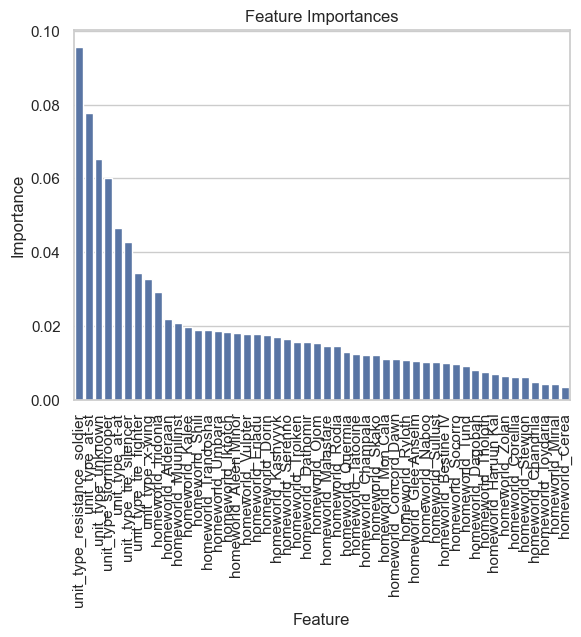

Most influential unit type: unit_type_resistance_soldier


In [33]:
importances = model.feature_importances_
features_df = pd.DataFrame({"Feature" : x.columns, "Importance" : importances})
features_df.sort_values(by="Importance", ascending=False, inplace=True)

sns.barplot(x="Feature", y="Importance", data=features_df)
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.title("Feature Importances")
plt.xticks(rotation=90)
plt.show()

max_index = features_df["Importance"].idxmax()
print(f"Most influential unit type: {features_df.loc[max_index, "Feature"]}")

In [34]:
import pickle

file_path = 'trained_model.pkl'

with open(file_path, 'wb') as file:
    pickle.dump(model, file)